In [1]:
from sklearn.datasets import make_classification

X, y = make_classification(n_samples=1000, n_features=20, n_informative=15, n_redundant=5, random_state=42)

print("Shape of X:", X.shape)
print("Shape of y:", y.shape)

Shape of X: (1000, 20)
Shape of y: (1000,)


In [2]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

print("Shape of X_train:", X_train.shape)
print("Shape of X_test:", X_test.shape)
print("Shape of y_train:", y_train.shape)
print("Shape of y_test:", y_test.shape)

Shape of X_train: (800, 20)
Shape of X_test: (200, 20)
Shape of y_train: (800,)
Shape of y_test: (200,)


In [3]:
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier

log_reg = LogisticRegression()
dt_clf = DecisionTreeClassifier()
knn_clf = KNeighborsClassifier()

base_models = [('lr', log_reg), ('dt', dt_clf), ('knn', knn_clf)]

In [4]:
from sklearn.ensemble import StackingClassifier
from sklearn.linear_model import LogisticRegression

stacking_clf = StackingClassifier(estimators=base_models, final_estimator=LogisticRegression())

In [5]:
stacking_clf.fit(X_train, y_train)

StackingClassifier(estimators=[('lr', LogisticRegression()),
                               ('dt', DecisionTreeClassifier()),
                               ('knn', KNeighborsClassifier())],
                   final_estimator=LogisticRegression())

In [6]:
y_pred = stacking_clf.predict(X_test)
print("First few predictions:", y_pred[:10])

First few predictions: [0 1 0 0 1 1 1 0 1 0]


In [7]:
from sklearn.metrics import accuracy_score

accuracy = accuracy_score(y_test, y_pred)
print("Accuracy of the stacking classifier:", accuracy)

Accuracy of the stacking classifier: 0.905


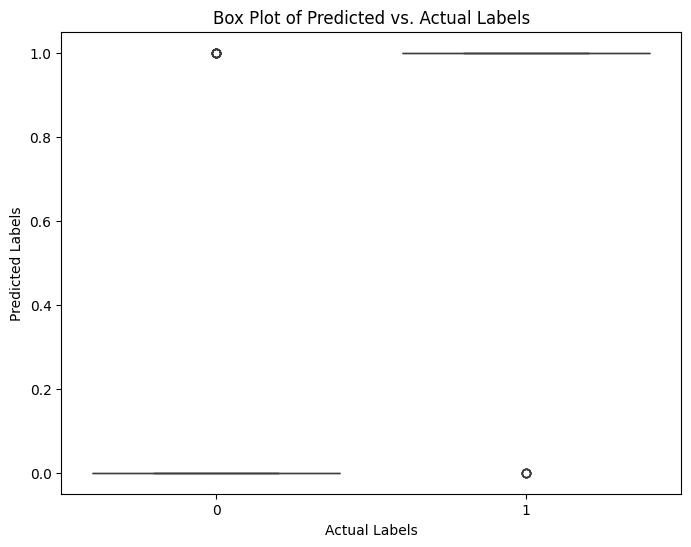

In [8]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

data = pd.DataFrame({'Actual Labels': y_test, 'Predicted Labels': y_pred})

plt.figure(figsize=(8, 6))
sns.boxplot(x='Actual Labels', y='Predicted Labels', data=data)
plt.title('Box Plot of Predicted vs. Actual Labels')
plt.xlabel('Actual Labels')
plt.ylabel('Predicted Labels')
plt.show()